
# Linear Regression

## Working Principle Introduction
Linear regression is a fundamental statistical and machine learning technique used to predict a quantitative response. It's a method that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The main goal of linear regression is to find the best-fitting straight line through the data points. It's widely used in various fields, including economics, biology, engineering, and more, for tasks like trend forecasting, determining the strength of predictors, and estimating real-world relationships.

The fundamental formula for a simple linear regression model is:

$$
y = \beta_0 + \beta_1x + \epsilon
$$

Where:
- $y$ is the predicted value.
- $\beta_0$ is the y-intercept.
- $\beta_1$ is the slope coefficient for the predictor $x$.
- $x$ is the independent variable.
- $\epsilon$ represents the error term.

For multiple linear regression, with multiple predictors, the formula is:

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n + \epsilon
$$

Where:
- $\beta_1, \beta_2, \dots, \beta_n$ are the coefficients for each independent variable $x_1, x_2, \dots, x_n$.

<div align="center">
<img src="LinearRegression.jpg" alt="alt text" width="450"/>
</div>

This image displays a scatter plot with a linear regression line. The red dots represent data points, and the blue line represents the regression line, indicating a positive correlation between the variables.


## Data Processing

In this section, I dive into a practical application of linear regression using the California Housing dataset. This dataset is well-known in the field of machine learning and contains data on housing features along with their median values.  To achieve this, I first perform data preprocessing, which mainly includes cleaning, and splitting the data into training and testing sets. This preparatory step is crucial for ensuring the accuracy and effectiveness of our linear regression model.



In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

# California House Pricing
california_housing = fetch_california_housing()
california = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california['MedHouseVal'] = california_housing.target

In [2]:
california.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [3]:
from sklearn.model_selection import train_test_split

X = california.drop('MedHouseVal', axis=1)
y = california['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


16512


## Linear Regression Analysis on Housing Price

In this section, I apply a linear regression model to the preprocessed California Housing data， where the house price is the dependent variable.. Utilizing Python's built-in functions, I fit the model to the data and calculate key performance metrics, including the coefficients, R-squared value, and Mean Squared Error (MSE).


In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print("MSE:", mse)
print("R²:", r2)

MSE: 0.5291402345397312
R²: 0.596596837481235


In [16]:
feature_names = X.columns
coefficients = lin_reg.coef_
coefficients_df = pd.DataFrame(data=coefficients, index=feature_names, columns=['Coefficient'])
coefficients_df

,Coefficient
MedInc,0.438565
HouseAge,0.009687
AveRooms,-0.104705
AveBedrms,0.632189
Population,-0.000004
AveOccup,-0.003448
Latitude,-0.425964
Longitude,-0.440601


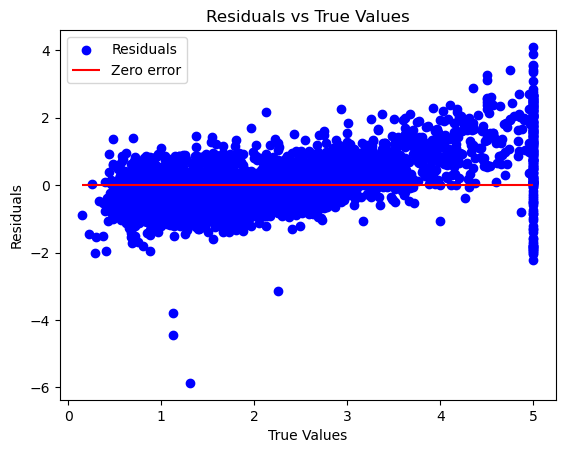

In [18]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='blue', label='Residuals')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red', label='Zero error')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals vs True Values')
plt.show()

The residual plot displayed here illustrates the differences, or residuals, between the actual and predicted values from a linear regression model.

Next, I calculated the parameters of the linear regression and the R-squared value directly using matrix computations. I observed that the first value in the coefficients is the intercept, and the remaining values are the coefficients of the variables.

In [12]:
def beta(X, y):
    normal_eqn = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return normal_eqn
design_mat = np.c_[np.ones((len(X_train),1)), X_train]
beta_hat = beta(design_mat, y_train)
beta_hat



array([-3.75157542e+01,  4.38565392e-01,  9.68722037e-03, -1.04705005e-01,
        6.32189474e-01, -3.67690711e-06, -3.44771323e-03, -4.25964056e-01,
       -4.40601114e-01])

In [14]:
X_test_mat = np.c_[np.ones((len(X_test),1)), X_test]
y_hat = X_test_mat.dot(beta_hat)

In [18]:
r_squared = 1-sum((y_test.values-y_hat)**2)/sum((y_test.values-statistics.mean(y_test.values))**2)
print(r_squared)

0.5965968374807598



## Conclusion

In this analysis, I employed two distinct methods to compute the coefficients and R-squared value for the linear regression model focused on California housing prices. The model yielded an R-squared value of 0.59, which indicates a relatively strong fit. Additionally, the residual plot reinforced the model's accuracy as most residuals were closely grouped around the zero-error line, suggesting that the majority of the predictions were precise. 

